Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [69]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('resources/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('resources/enrollments.csv')    
daily_engagement = read_csv('resources/daily_engagement.csv')
project_submissions = read_csv('resources/project_submissions.csv')

print enrollments[0]
print daily_engagement[0]
print project_submissions[0]


{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def get_acctKeys(list, i):
    acctKeys = []
    for line in list:
        acctKeys.append(line[i])
    return acctKeys

def get_uniq_acctKeys(list, k):
    uniq_acct_keys = set()
    for line in list:
        uniq_acct_keys.add(line[k])
    return uniq_acct_keys

enrollment_num_rows = len(enrollments)             # Replace this with your code
#enrollment_num_unique_students = len(set(get_acctKeys(enrollments, 'account_key')))  # Replace this with your code
enrollment_num_unique_students = len(get_uniq_acctKeys(enrollments, 'account_key'))

engagement_num_rows = len(daily_engagement)             # Replace this with your code
#engagement_num_unique_students = len(set(get_acctKeys(daily_engagement, 'acct')))  # Replace this with your code
engagement_num_unique_students = len(get_uniq_acctKeys(daily_engagement, 'acct'))

submission_num_rows = len(project_submissions)             # Replace this with your code
#submission_num_unique_students = len(set(get_acctKeys(project_submissions, 'account_key'))) 
submission_num_unique_students = len(get_uniq_acctKeys(project_submissions, 'account_key'))

print enrollment_num_rows
print enrollment_num_unique_students

print engagement_num_rows
print engagement_num_unique_students

print submission_num_rows
print submission_num_unique_students

1640
1302
136240
1237
3642
743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for line in daily_engagement:
    line['account_key'] = line.pop('acct')
    
print daily_engagement[0]['account_key']


0


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

engagement_unique_acct_key = get_uniq_acctKeys(daily_engagement, 'account_key')

for record in enrollments:
    if record['account_key'] not in engagement_unique_acct_key:
        print record
        break
        


{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
# why there are more enrollment than enrollment unique students
missing_engagement = []
for record in enrollments:
    if record['cancel_date'] != record['join_date'] and record['account_key'] not in engagement_unique_acct_key:
        missing_engagement.append(record['account_key'])
        print record
missing_engagement

#print missing_engagement
for record in enrollments:
     if record['account_key'] == '1304':
            print record
            


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}


## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [65]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for record in non_udacity_enrollments:
    if not record['is_canceled'] or record['days_to_cancel'] > 7:
        account_key = record['account_key']
        enrollment_date = record['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

print len(paid_students)

995


## Getting Data from First Week

In [67]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [68]:
def remove_free_trial_cancel(data):
    new_data = []
    for record in data:
        if record['account_key'] in paid_students:
            new_data.append(record)
    return new_data

paid_enrollments = remove_free_trial_cancel(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancel(non_udacity_engagement)
paid_submissions = remove_free_trial_cancel(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [16]:
#print paid_engagement[0]
for record in paid_engagement:
    if record['num_courses_visited'] > 0:
        record['has_visited'] = 1
    else:
        record['has_visited'] = 0
        

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for record in paid_engagement:
    account_key = record['account_key']
    join_date = paid_students[account_key]  
    engagement_record_date = record['utc_date']
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(record)

print len(paid_engagement_in_first_week)


6920


## Exploring Student Engagement

In [46]:
%pylab inline

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def group_by_data(data, key_name):
    group_by_data = defaultdict(list)
    for record in data:
        key = record[key_name]
        group_by_data[key].append(record)
    return group_by_data

def total_groups_by_data(grouped_data, field_name):
    total_groups_by_data = {}
    for key, record in grouped_data.items():
        total_groups = 0
        for e in record:
            total_groups += e[field_name]
        total_groups_by_data[key] = total_groups
    return total_groups_by_data

def describe_data(data):
    print "Means: ", np.mean(data)
    print "Standard Deviation: ", np.std(data)
    print "Min: ", np.min(data)
    print "Max: ", np.max(data)
    plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


In [19]:
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = group_by_data(paid_engagement_in_first_week, 'account_key')


In [20]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = total_groups_by_data(engagement_by_account, 'total_minutes_visited')


In [21]:

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Means:  305.414718908
Standard Deviation:  405.91261032
Min:  0.0
Max:  3564.7332645


In [66]:
student_with_max_minutes = None
max_minutes = 0
for student, total_minutes in total_minutes_by_account.items():
    if max_minutes < total_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
print max_minutes

student_with_max_minutes_records =  []
for record in paid_engagement_in_first_week:
    if record['account_key'] == student_with_max_minutes:
        student_with_max_minutes_records.append(record)
        
print student_with_max_minutes_records

3564.7332645
[{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'a

## Debugging Data Analysis Code

In [ ]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## Lessons Completed in First Week

In [22]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

#print paid_engagement_in_first_week[0]

engagements_by_account = group_by_data(paid_engagement_in_first_week, 'account_key')

total_lessons = total_groups_by_data(engagements_by_account, 'lessons_completed').values()

describe_data(total_lessons)

Means:  1.63216080402
Standard Deviation:  3.00140182563
Min:  0
Max:  36


## Number of Visits in First Week

In [23]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

#print paid_engagement_in_first_week[0]

total_days_visited = total_groups_by_data(engagements_by_account, 'has_visited').values()
describe_data(total_days_visited)


Means:  2.91256281407
Standard Deviation:  2.22037005491
Min:  0
Max:  7


## Splitting out Passing Students

In [24]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

#print paid_submissions[0]

passing_subway_project = set()
for record in paid_submissions:
    subway_project_lesson_keys = ['746169184', '3176718735']
    passing_ratings = ['PASSED', 'DISTINCTION']
    if record['lesson_key'] in subway_project_lesson_keys and record['assigned_rating'] in passing_ratings:
        passing_subway_project.add(record['account_key'])
print len(passing_subway_project)

passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in passing_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)
print len(non_passing_engagement)

647
4528
2392


## Comparing the Two Student Groups

In [35]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
print passing_engagement[0]
passing_engagements_by_account = group_by_data(passing_engagement, 'account_key')
passing_total_minutes = total_groups_by_data(passing_engagements_by_account, 'total_minutes_visited').values()
print 'passing minutes:'
describe_data(passing_total_minutes)

non_passing_engagements_by_account = group_by_data(non_passing_engagement, 'account_key')
non_passing_total_minutes = total_groups_by_data(non_passing_engagements_by_account, 'total_minutes_visited').values()
print 'non passing minutes:'
describe_data(non_passing_total_minutes)


{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
passing minutes:
Means:  391.481722325
Standard Deviation:  439.653061726
Min:  0.0
Max:  3564.7332645
non passing minutes:
Means:  145.399341866
Standard Deviation:  268.97150373
Min:  0.0
Max:  1768.52274933


In [33]:

passing_total_lessons = total_groups_by_data(passing_engagements_by_account, 'lessons_completed').values()
print 'passing lessons:'
describe_data(passing_total_lessons)

non_passing_total_lessons = total_groups_by_data(non_passing_engagements_by_account, 'lessons_completed').values()
print 'non passing lessons:'
describe_data(non_passing_total_lessons)

passing lessons:
Means:  2.04327666151
Standard Deviation:  3.1428602763
Min:  0
Max:  36
non passing lessons:
Means:  0.867816091954
Standard Deviation:  2.54833703959
Min:  0
Max:  27


In [34]:
passing_total_days_visited = total_groups_by_data(passing_engagements_by_account, 'has_visited').values()
print 'passing days visited:'
describe_data(passing_total_days_visited)

non_passing_total_days_visited = total_groups_by_data(non_passing_engagements_by_account, 'has_visited').values()
print 'non passing days visited:'
describe_data(non_passing_total_days_visited)

passing days visited:
Means:  3.42967542504
Standard Deviation:  2.21298340866
Min:  0
Max:  7
non passing days visited:
Means:  1.95114942529
Standard Deviation:  1.88929952676
Min:  0
Max:  7


## Making Histograms

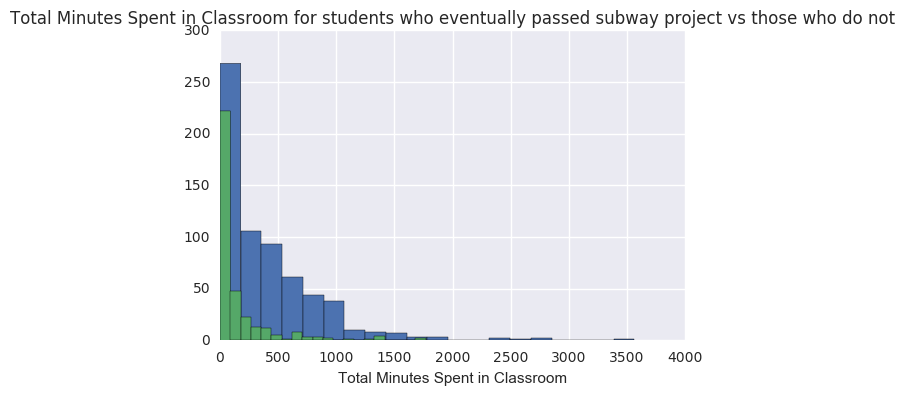

In [51]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(passing_total_minutes, bins = 20)
plt.hist(non_passing_total_minutes, bins = 20)
plt.xlabel('Total Minutes Spent in Classroom')
plt.title('Total Minutes Spent in Classroom for students who eventually passed subway project vs those who do not')

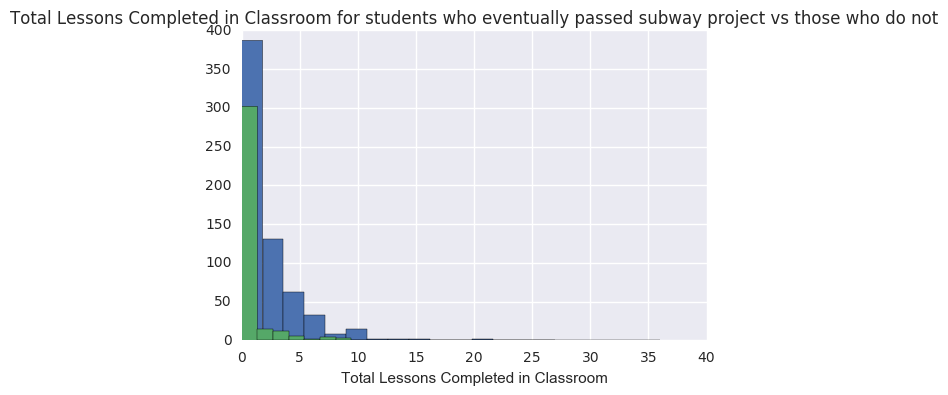

In [50]:
import seaborn as sns
plt.hist(passing_total_lessons, bins=20)
plt.hist(non_passing_total_lessons, bins=20)
plt.xlabel('Total Lessons Completed in Classroom')
plt.title('Total Lessons Completed in Classroom for students who eventually passed subway project vs those who do not')

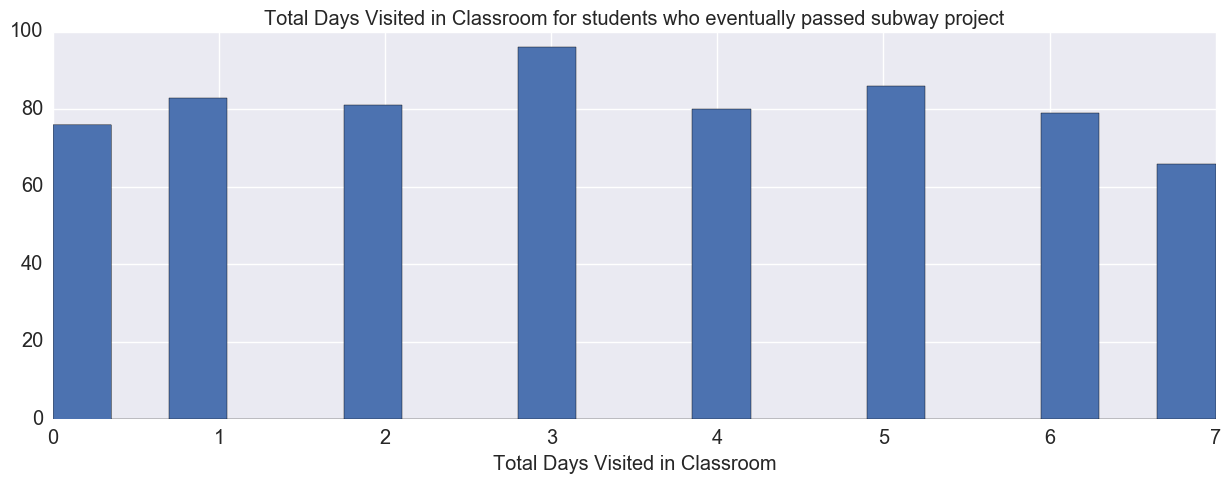

In [63]:
import seaborn as sns
plt.hist(passing_total_days_visited, bins=20)
plt.xlabel('Total Days Visited in Classroom')
plt.title('Total Days Visited in Classroom for students who eventually passed subway project')

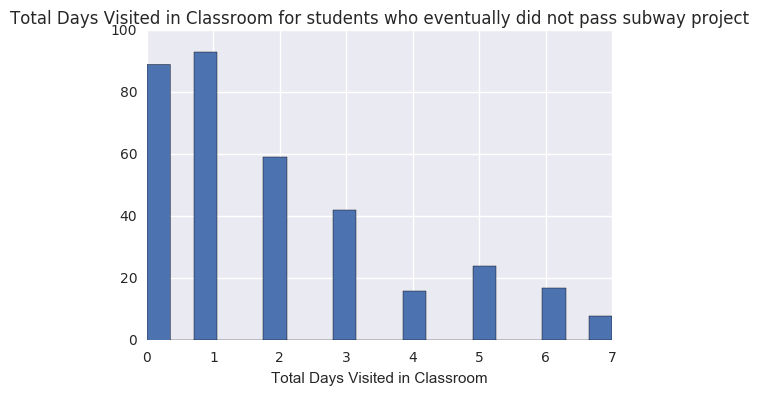

In [53]:
import seaborn as sns
plt.hist(non_passing_total_days_visited, bins=20)
plt.xlabel('Total Days Visited in Classroom')
plt.title('Total Days Visited in Classroom for students who eventually did not pass subway project')

## Improving Plots and Sharing Findings

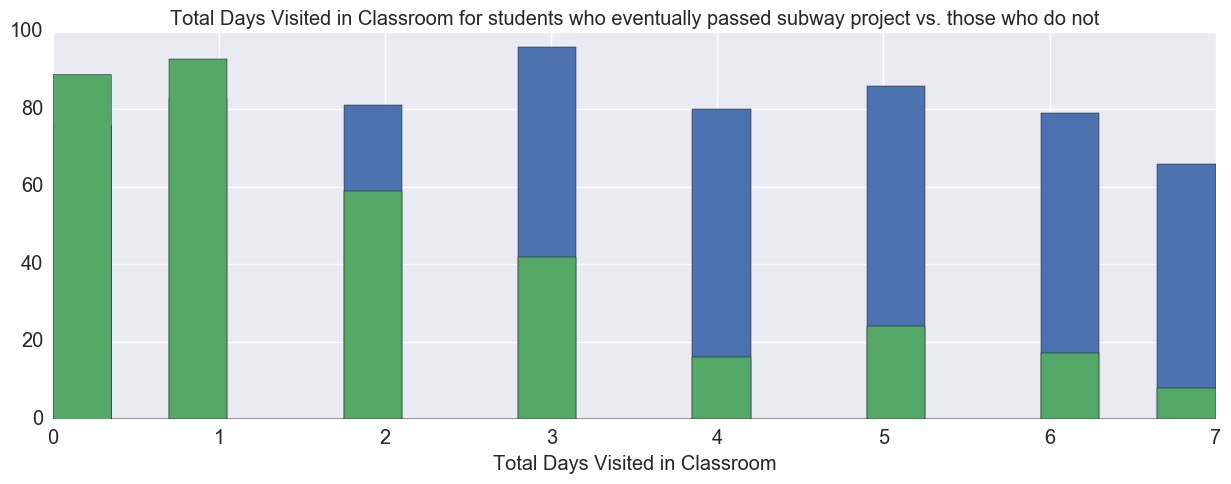

In [64]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.hist(passing_total_days_visited, bins=20)
plt.hist(non_passing_total_days_visited, bins=20)
plt.xlabel('Total Days Visited in Classroom')
plt.title('Total Days Visited in Classroom for students who eventually passed subway project vs. those who do not')